In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy.ma as ma

In [ ]:
!pip install -y numba
from numba import jit


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
def setup_problem(L,N): #L =longitud, N= iteraciones
    XMIN = 0.0
    YMIN = 0.0
    DELTA = L/(N)
    X = XMIN + DELTA*np.arange(0, N)
    Y = XMIN + DELTA*np.arange(0, N)
    return X, Y #Coordenadas reales

In [ ]:
# Boundary conditions
@jit
def bc(matrix, x, y,l):
    # YOUR CODE HERE
    #print(f"x={x}")
    matrix[:,0]=10*np.sin(np.pi*x/l)
    matrix[:,-1]=0
    matrix[0,:]=0
    matrix[-1,:]=0
    
    #Anillo
    eps=l/matrix.shape[0] 
    C=l/2 #Centro del dominio
    r0=(l/8)**2 #Radio
    for xi in x:
      for  yi in y:
        r2=(xi-C)**2 + (yi-C)**2
        if np.abs(r2 - r0)<=eps :
          #print(f"xi={xi} \n yi={yi}\n")
          POSx=list(np.where(x==xi)[0])[0]
          POSy=list(np.where(y==yi)[0])[0]
          #print(f"Posx={POSx} \n Posy={POSy}\n")
          matrix[POSx,POSy]=10

          
        
    return matrix    
    #print(matrix)
    #print(f"r0 ={r0}")
    #print(r2)

In [ ]:
@jit
def gs_opt(matrix):
    matrix_old = matrix.copy() # Might be slow, creates copies all the time
    N = matrix.shape[0]
    # YOUR CODE HERE

    for ii in range(0, N):
        for jj in range(0, N):
            if ii == 0 or jj == 0 or ii == N-1 or jj == N-1 or matrix[ii,jj]==10 :
                continue
            matrix[ii, jj] = 0.25*(matrix[ii+1,jj] + matrix[ii-1,jj] + matrix[ii,jj+1] + matrix[ii,jj-1])


In [ ]:

@jit
def solve_system(L, N, niter, iter_method):
    X, Y = setup_problem(L,N)
    V = np.zeros((N, N))
    bc(V, X, Y, L)

    for step in range(niter):
        iter_method(V)
    return V

<ipython-input-6-3996693119c6>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "solve_system" failed type inference due to: Untyped global name 'setup_problem': Cannot determine Numba type of <class 'function'>

File "<ipython-input-6-3996693119c6>", line 3:
def solve_system(L, N, niter, iter_method):
    X, Y = setup_problem(L,N)
    ^

  @jit
<ipython-input-6-3996693119c6>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "solve_system" failed type inference due to: Untyped global name 'setup_problem': Cannot determine Numba type of <class 'function'>

File "<ipython-input-6-3996693119c6>", line 3:
def solve_system(L, N, niter, iter_method):
    X, Y = setup_problem(L,N)
    ^

  @jit
/usr/local/lib/python3.9/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "solve_system" was compiled in object mode without forceobj=True, but has lifted loops.

File

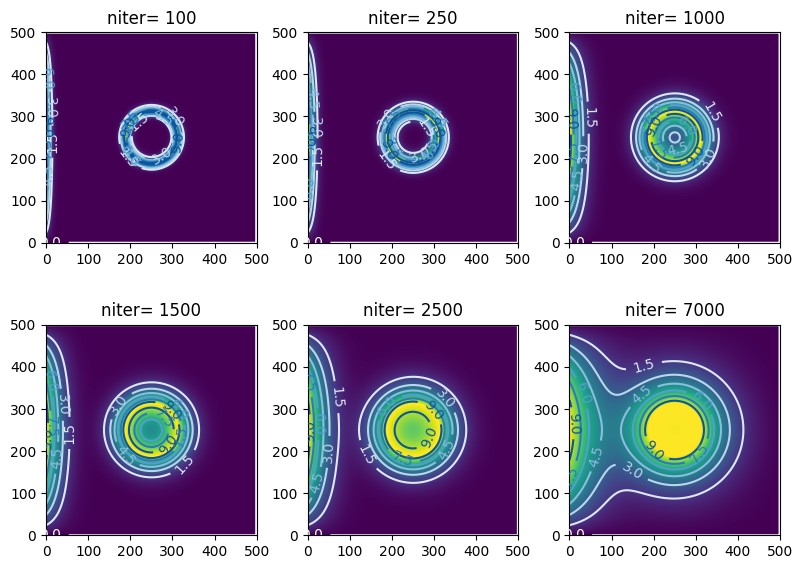

In [ ]:

fig, ax = plt.subplots(2, 3, figsize=(8,6))
ax = ax.flatten()

for ii, niter in enumerate([100, 250, 1000, 1500, 2500, 7000]):
    V = solve_system(L=5,N=500, niter=niter, iter_method=gs_opt)
    ax[ii].set_aspect('equal', 'box')
    ax[ii].pcolormesh(V)
    ax[ii].set_title(f"niter= {niter}")
    CS = ax[ii].contour(V, cmap='Blues')
    ax[ii].clabel(CS, CS.levels, inline=True)
fig.tight_layout()

plt.savefig('Equipotenciales.pdf') #para guar

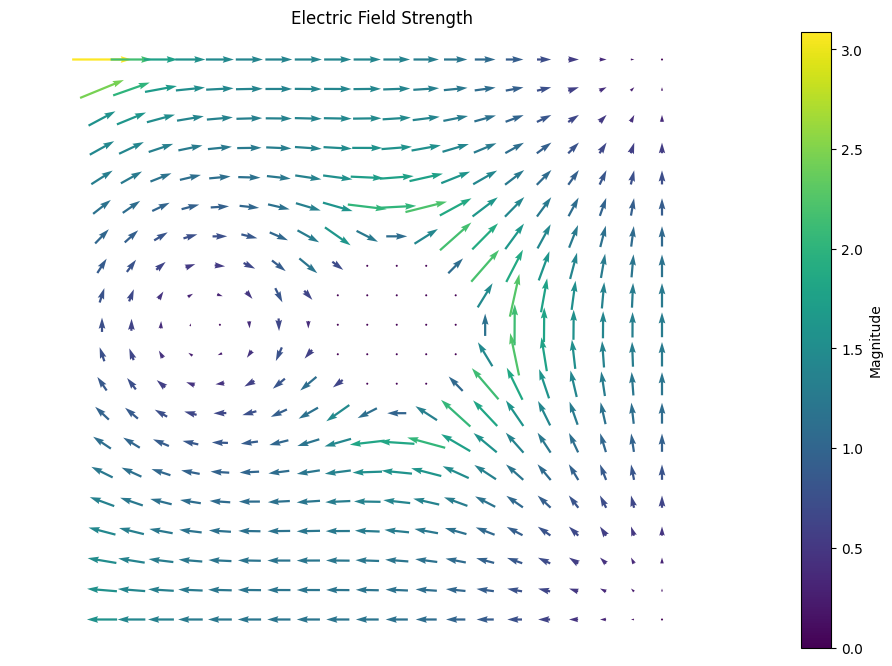

In [ ]:
L=5
N=20

V = solve_system(L,N, niter=7000, iter_method=gs_opt)
#Coordenadas
x, y = setup_problem(L,N) 
X,Y = np.meshgrid(x,y)

#Fuerza
Ex, Ey =np.gradient(-V)
C=np.hypot(Ex, Ey)

plt.figure(figsize=(12, 8))
plt.quiver(X, Y, Ex, Ey, C,pivot='mid')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude')
# misc
plt.title('Electric Field Strength')
plt.axis('equal')
plt.axis('off')

plt.savefig('Campo.pdf')

plt.show()

